# Python Bootcamp: June 7th, 2022
## Maps and Spatial Data
### Samuel Mogen and Megan TM

## Scientific Goals
- Understand different map projections
- Understand how data is projected

## Coding Goals
- Review reading in data with Xarray
- Learn the basics of Cartopy
- Create good looking maps with Matplotlib and Cartopy

## Notebook Outline
- 5.1: Reading netCDF files
- 5.2: Plotting spatial data without projections
- 5.3: Different map projections
- 5.4: Introduction to Cartopy
- 5.5: Map your own data
- 5.6: Subplots and saving figures

**As a reminder:** <br>
Text in black will be instruction and guidance and will usually start with a section number.<br>
<span style="color:blue"> Text in blue will be tasks to do.</span><br>
<span style="color:red"> Text in red will be optional challenges and advanced concepts.</span>

## 5.1: Reading in netCDF files with Xarray

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

<font color = 'blue'> As a review, please make sure you have `pH.nc` downloaded and read it in using Xarray
    
<font color = 'blue'> hint: use `xr.open_dataset`

In [9]:
ds = xr.open_dataset('pH.nc')

Check out the dimensions of the dataset...

In [10]:
ds

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180, time: 180)
Coordinates:
  * lon      (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2012-12-01
Data variables:
    pH       (time, lat, lon) float32 ...

So we have a coordinate system of latitude by longitude by time...

**How do we index to select a certain variable at some lat/lon/time?**

<font color='blue'> Now try to index some data of this data

<font color='blue'> Select data for the pH of water...

In [11]:
pH = ds.pH

<font color='blue'> Then, index this data so you only have the time from the year 1998

In [12]:
pH_1998 = pH.sel(time=slice('1998-01-01','1998-12-01')).mean(dim='time')

<font color='blue'> now get a slice of data that corresponds to latitudes -65.5:65.5 and longitudes from 109.5:275.5

In [13]:
pH_pac = pH_1998.sel(lat=slice(-65.5,65.5),lon=slice(109.5,288.5))

<font color='blue'> average this newly sliced data over the year and save out as a new variable!

In [14]:
pH_pac_1998 = pH_pac

## 5.2: plot this data

now that we know how to index this data by location and time, we want to start thinking about plotting the data!

Xarray makes it really easy to make basic plots with given data...

For example, you can simply say `ds.plot()` and Xarray will attempt to plot the data in a nice way

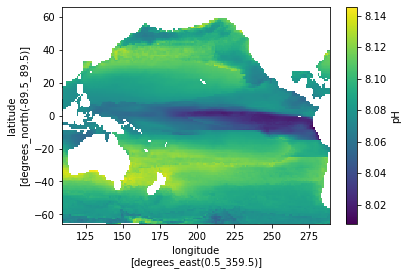

In [15]:
pH_pac_1998.plot()

this works for data with clear dimensions... Our map here shows the portion of the Pacific that we sliced in the year 1998.

But when you give a datasets that is not as clear, you might get a weird plot...

(array([1.000000e+00, 2.000000e+00, 6.920000e+02, 3.472400e+05,
        4.355745e+06, 7.947550e+05, 3.241900e+04, 6.143000e+03,
        2.360000e+02, 2.400000e+01]),
 array([7.748   , 7.8207  , 7.8934  , 7.9661  , 8.0388  , 8.1115  ,
        8.1842  , 8.256901, 8.3296  , 8.4023  , 8.475   ], dtype=float32),
 <BarContainer object of 10 artists>)

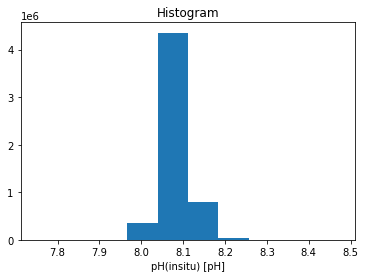

In [16]:
ds.pH.plot()

This histogram is **not** a useful way to look at information

**Make sure to subset data correctly so you can use Xarray's plotting to quickly look through data**

back to our previous map:

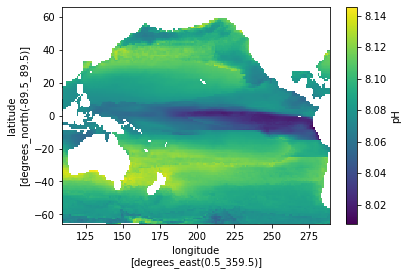

In [17]:
pH_pac_1998.plot()

You can see clearly where the continent are supposed be! But they don't look very clean

**We need to tell Python how we want this data to be presented.**

## 5.3: Map projections

There are a variety of ways to present spatial data - maps can be projected in a number of ways. More information on map projections can be found [here](https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html).

When is each projection useful?

## 5.4: Cartopy

#### To make a base map look more professional, we are going to import a new package...

In [18]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Cartopy allows you plot a given spatial dataset on an actual map of the world (or specific region) so that it looks nice. It will work with all sorts of datasets and relies on the plotting power of matplotlib

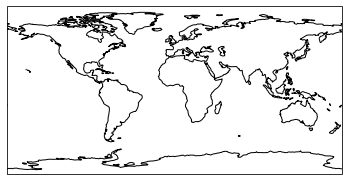

In [19]:
# To start, we will plot a blank map with the PlateCarree projection...
ax = plt.axes(projection=ccrs.PlateCarree()) 
ax.coastlines() 
# at it's simplest, cartopy allows you to plot a map of the globe with no data

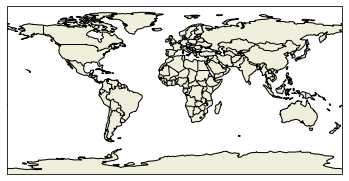

In [20]:
# aside from coastlines, there are various other features you can add to maps!
ax = plt.axes(projection=ccrs.PlateCarree()) 

ax.coastlines() # Coastlines
ax.add_feature(cfeature.LAND) # Land
ax.add_feature(cfeature.BORDERS) # National Border

#### As mentioned earlier, Cartopy has a number of different projections you can use.

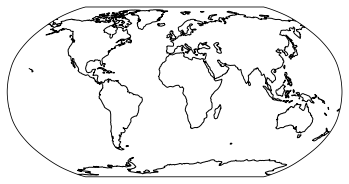

In [21]:
# plot a blank map with the Robinson projection
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines()

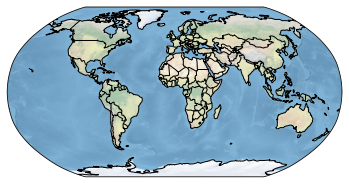

In [22]:
# Cartopy also has built in base maps, that allow you plot what looks like the Earth from space
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img() # satellite stock image of earth
ax.coastlines() # Coastlines
ax.add_feature(cfeature.BORDERS) # National borders

### <font color='blue'> Breakout
<font color='blue'> **Look at the projections list available in Cartopy and create some blank plots from 3 new projections**

<font color='blue'> Use different projections and center the map at different points!

<font color='blue'> Plot using:
- <font color='blue'> SouthPolarStereo
- <font color='blue'> Orthographic
- <font color='blue'> Projection of your choice
    
<font color='blue'> For each projection, **plot a map** centered on a longitude of your choosing and **explain when this projection might be useful**

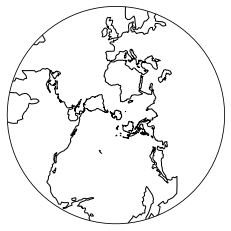

In [23]:
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.coastlines()

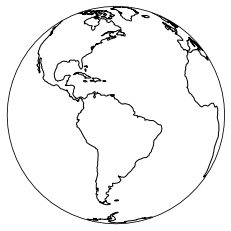

In [24]:
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=300))
ax.coastlines()

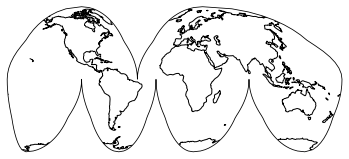

In [25]:
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()

### cartopy also allows you subset data to specific regions on maps themselves, meaning you don't necessarily need to subset the data itself by latitude and longitude...

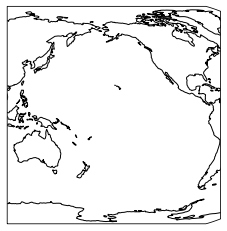

In [26]:
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180)) 
# you can change the central longitude of the map

ax.coastlines()

# we earlier subset to latitudes -65.5:65.5 and longitudes from 109.5:275.5
# We can use ax.set_extent([x0,x1,y0,y1]) to replicate this without limiting our data!

ax.set_extent([109.5,288.5,-65.5, 65.5])

## 5.5: Add some of your own data to these

Now that we know how to make blank maps using Cartopy, how can we actually add our own data?

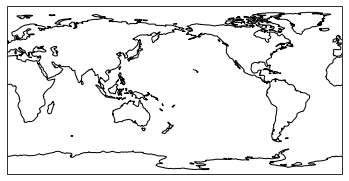

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.coastlines()

# data???

Try by plotting using the contourf feature

For example, you can call it using `ax.contourf()`

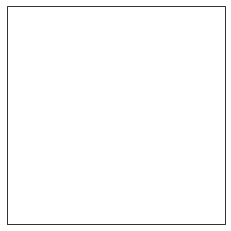

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.coastlines()


ax.contourf(pH_1998)

Without information on the latitude and longitude, Cartopy and the data have no idea how to interact

To plot effectively, you need to supply the function with: the longitude, latitude and data

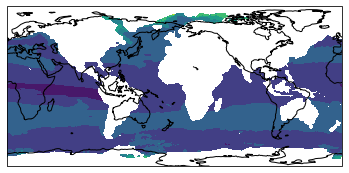

In [29]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.coastlines()

ax.contourf(pH_1998.lon,pH_1998.lat,pH_1998)

but this looks bad...

The data and cartopy have no clue how to interact!

**You need to tell the contourf data how... use the `transform = ccrs.Projection()` command when plotting**

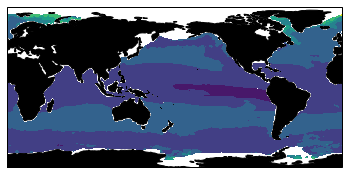

In [27]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.add_feature(cfeature.LAND,color='k')

ax.contourf(pH_1998.lon,pH_1998.lat,pH_1998,
            transform=ccrs.PlateCarree())

**again, this data can be subset...**

### <font color='blue'> Breakout

<font color='blue'> **Try subsetting data for yourself using `ax.set_extent()`** - and compare to the plot of the subset data we made earlier!

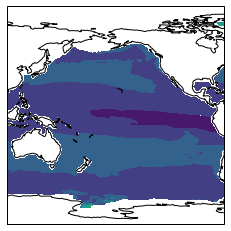

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.coastlines()
ax.contourf(pH_1998.lon,pH_1998.lat,pH_1998,transform=ccrs.PlateCarree())

ax.set_extent([109.5,288.5,-65.5, 65.5]) # solution


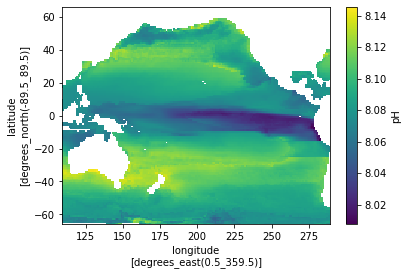

In [29]:
# compared to the following plot, this looks so clean
pH_pac_1998.plot()

### 5.5.1: How can we locate a specific spot?

What happens if we want to mark the general location of, say, Hawaii on a map?

Hawaii (the Big Island) is located near latitude 19.5N and longitude 201E.

In [51]:
# set the latitude and longitude we want 
# (remember to convert the longitude) to degrees east!
lat_hawaii = 19.5
lon_hawaii = 201

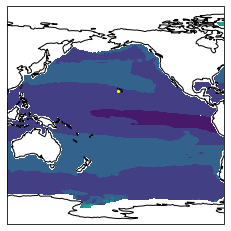

In [59]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180)) # you can change the central longitude of the map
ax.coastlines()
ax.contourf(pH_1998.lon,pH_1998.lat,pH_1998,transform=ccrs.PlateCarree())

ax.set_extent([109.5,288.5,-65.5, 65.5]) # solution

ax.scatter(lon_hawaii, lat_hawaii,
            s=4, # sets the markersize
            color='Yellow', # sets the color
            transform=ccrs.PlateCarree(), # sets the projection!
            zorder = 10 # makes sure that this is plotted above other data!
          )

## 5.6: Colormaps, Subplots, and Saving figures

#### 5.6.1: Colormaps

You may have noticed that plotting will choose its own color scheme for data. Oftentimes, we want to control the colors that are used and the range of values that are displayed - to do this, we will use the `cmap = ` and `levels = ` commands...

A list of available base colormaps can be seen in the Matplotlib documentation [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

**also include the `figsize = (width,height)`**. `figize = (1,1)` would created a 1 inch by 1 inch plot

<font color='blue'> The data we are working with today seems most suited for sequential colormaps. Choose the colormap `Reds` from below and use that  in plotting...
    
<img src="sphx_glr_colormaps_002.webp"> 
    
- <font color='blue'> Plot `pH_1998` with the `cmap = 'Reds'`. Also include a specific `figsize`.
  
- <font color='red'> Include a colorbar in this plot (hint: the colorbar needs to know what plot it is referencing)

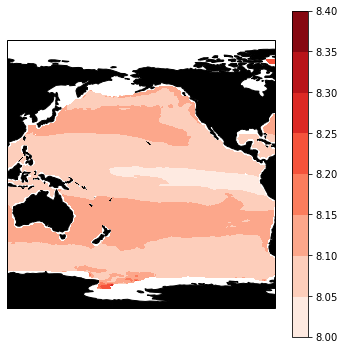

In [30]:
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(pH_1998.lon,pH_1998.lat,pH_1998,
                 transform=ccrs.PlateCarree(), 
                 cmap = 'Reds')

ax.set_extent([109.5,288.5,-65.5, 65.5])

f.colorbar(im)

Because we want lower values of pH to pop out, lets reverse the Reds (so lower values are **more** red...

Change `Reds` to `Reds_r`

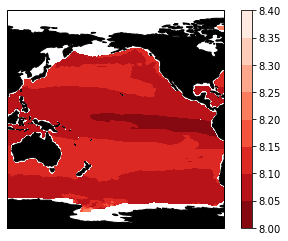

In [32]:
f, ax = plt.subplots(nrows=1,ncols=1,subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(pH_1998.lon,pH_1998.lat,pH_1998,
                 transform=ccrs.PlateCarree(), 
                 cmap = 'Reds_r')
ax.set_extent([109.5,288.5,-65.5, 65.5])

f.colorbar(im)

We also want to control exactly where the cutoffs are for the data using the levels command and extend the colorbar so values outside of the range are plotted correctly!

Use `levels = np.arange(lower_bound, upper_bound, step)` and `extend = 'both'`

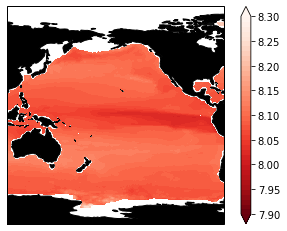

In [33]:
f, ax = plt.subplots(nrows=1,ncols=1,subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(pH_1998.lon,pH_1998.lat,pH_1998,
                 transform=ccrs.PlateCarree(), 
                 cmap = 'Reds_r',
                 levels = np.arange(7.9,8.3,0.01),
                 extend = 'both')

ax.set_extent([109.5,288.5,-65.5, 65.5])

f.colorbar(im)

#### 5.6.2: The magic of `.groupby()` and subplots

### <font color='blue'> Breakout

<font color='blue'> how would you make group data different seasons and make subplots?

You can use the following command to group data by seasons (Xarray is great!)
```python
pH.groupby('time.season').mean()
```        
You can then index this data, to get  global values for each season

Helpful hint, subplots can be created with:
```python
f, axs = plt.subplots(nrows= ? ,ncols= ?,subplot_kw=dict(projection= ?? ))
```
Where each sublot from 0 to n can be called with:
```python
axs[n].contouf(...)
```
<font color='blue'> Using this grouping, make a plot with four subplots showing pH in the Pacific for each season (hint: use a for loop in calling the plotting functions to loop through the seasons and subplots).

In [35]:
seasons = pH.groupby('time.season').mean()

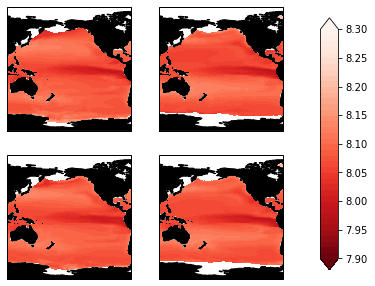

In [36]:
f, axs = plt.subplots(nrows=2,ncols=2,figsize=(5,5),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
axs = axs.flatten()

for i in range(0,4):
    im = axs[i].contourf(seasons.lon,seasons.lat,seasons.isel(season=i),
                         transform=ccrs.PlateCarree(),
                         cmap = "Reds_r",
                         levels=np.arange(7.9, 8.3, 0.01),
                         extend = 'both')
    axs[i].set_extent([109.5,288.5,-65.5, 65.5])
    axs[i].add_feature(cfeature.LAND,color='k')  
    
cbar_ax = f.add_axes([1, 0.15, 0.05, 0.7])
f.colorbar(im,cax=cbar_ax,fraction=0.046,pad=0.04)

#### 5.6.3: Saving figures

Use the function `f.savefig(dpi = )` to save a plot as an image. DPI refers to 'dots per inch', which basically controls how the file being saved is.

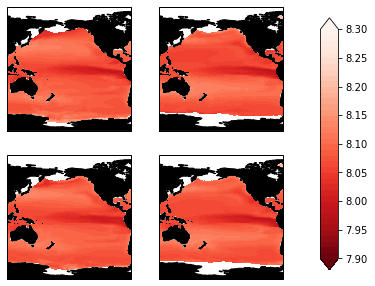

In [37]:
f, axs = plt.subplots(nrows=2,ncols=2,figsize=(5,5),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
axs = axs.flatten()

for i in range(0,4):
    im = axs[i].contourf(seasons.lon,seasons.lat,seasons.isel(season=i),
                         transform=ccrs.PlateCarree(),
                         cmap = "Reds_r",
                         levels=np.arange(7.9, 8.3, 0.01),
                         extend = 'both')
    axs[i].set_extent([109.5,288.5,-65.5, 65.5])
    axs[i].add_feature(cfeature.LAND,color='k')  
    
cbar_ax = f.add_axes([1, 0.15, 0.05, 0.7])
f.colorbar(im,cax=cbar_ax,fraction=0.046,pad=0.04)

f.savefig("test_file_save.png",facecolor='white',dpi = 100)